#Importing Required Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#Connecting to Database

In [32]:
conn = sqlite3.connect("sales_data.db")

#Creating Table

In [33]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

data = [
    ('Apple', 10, 1.00),
    ('Banana', 15, 0.50),
    ('Apple', 5, 1.00),
    ('Orange', 15, 0.75),
    ('Banana', 10, 0.50),
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

#Executing Queries

In [34]:
query1 = """
SELECT * FROM sales
"""
df = pd.read_sql_query(query1, conn)
df

,product,quantity,price
0,Apple,10,1.00
1,Banana,15,0.50
2,Apple,5,1.00
3,Orange,15,0.75
4,Banana,10,0.50


In [35]:
query2 = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query2, conn)
df

,product,total_qty,revenue
0,Apple,15,15.00
1,Banana,25,12.50
2,Orange,15,11.25


#Plotting Bar Graph for Sales

Text(0.5, 1.0, 'Revenue by Product')

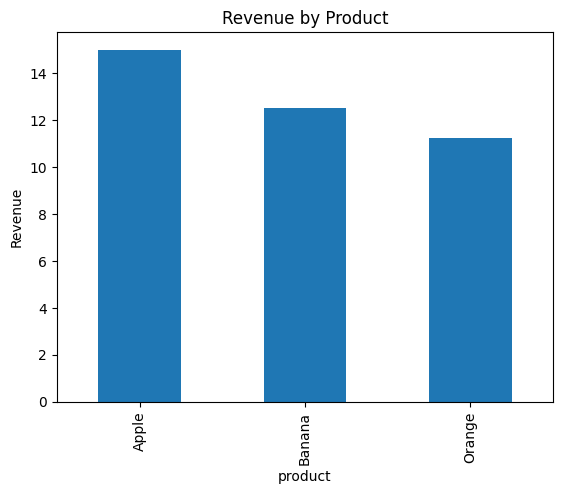

In [36]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product")

#Saving Chart

In [37]:
plt.savefig("sales_chart.png")
plt.show()
conn.close()

<Figure size 640x480 with 0 Axes>